In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("housing.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [3]:
df.dropna(inplace=True)

In [5]:
from sklearn.model_selection import train_test_split
x=df.drop(['median_house_value'],axis=1)
y=df['median_house_value']

In [6]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

In [8]:
train_data=x_train.join(y_train)

[[<Axes: title={'center': 'longitude'}>
  <Axes: title={'center': 'latitude'}>
  <Axes: title={'center': 'housing_median_age'}>]
 [<Axes: title={'center': 'total_rooms'}>
  <Axes: title={'center': 'total_bedrooms'}>
  <Axes: title={'center': 'population'}>]
 [<Axes: title={'center': 'households'}>
  <Axes: title={'center': 'median_income'}>
  <Axes: title={'center': 'median_house_value'}>]]


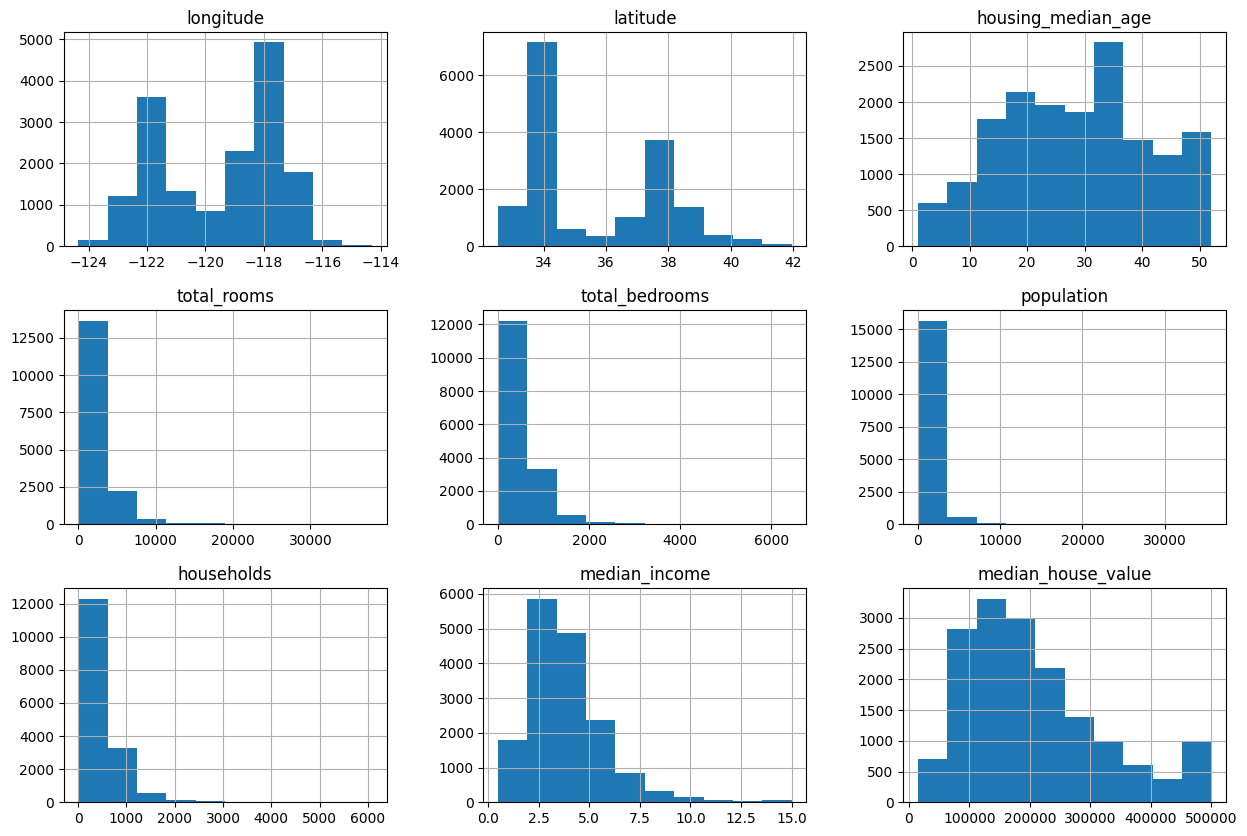

In [13]:
print(train_data.hist(figsize=(15,10)))

<Axes: >

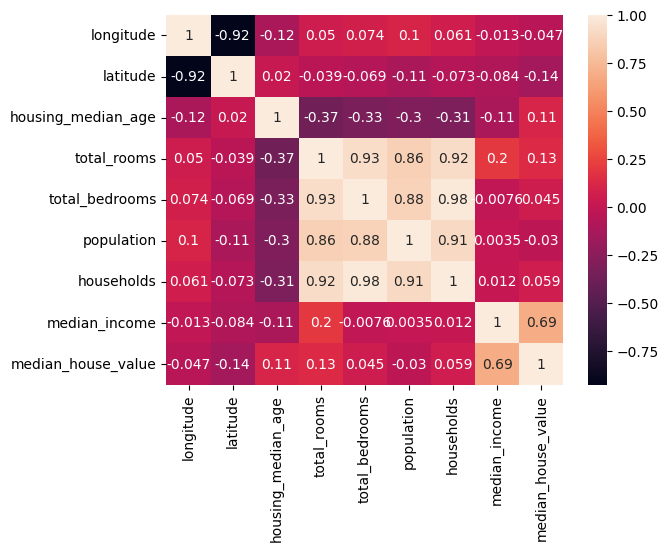

In [19]:
sns.heatmap(train_data.corr(numeric_only=True),annot=True)

In [22]:
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['households']=np.log(train_data['households']+1)
train_data['population']=np.log(train_data['population']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

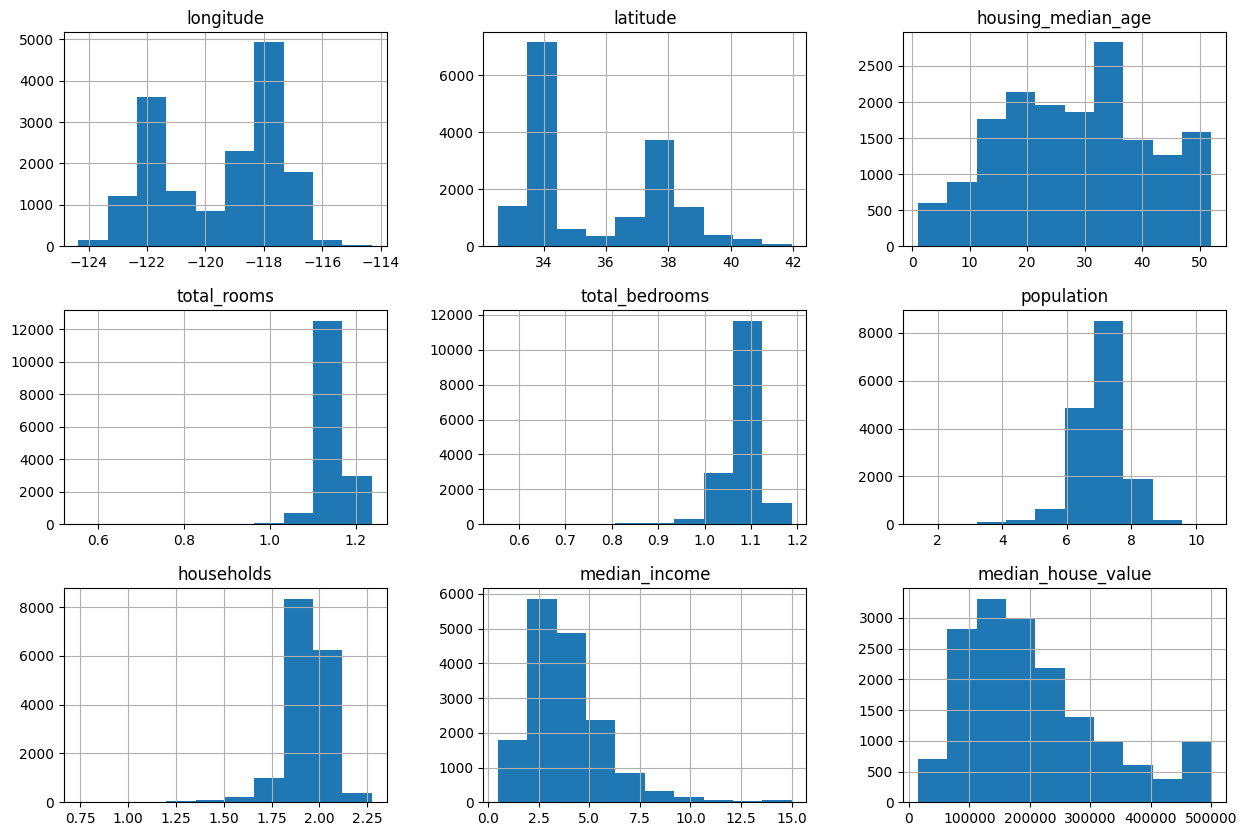

In [24]:
train_data.hist(figsize=(15,10))

In [ ]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

In [31]:
train_data=train_data.astype(int)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
18860,-122,38,15,1,1,8,2,5,179500,0,0,0,1,0
3173,-119,36,25,1,1,6,1,3,103100,0,1,0,0,0
12425,-116,33,10,1,1,7,1,1,65400,0,1,0,0,0
458,-122,37,52,1,1,7,1,0,350000,0,0,0,1,0
12184,-117,33,5,1,1,8,2,5,168700,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11318,-117,33,15,1,1,7,1,3,160900,1,0,0,0,0
12079,-117,33,22,1,1,7,1,4,189800,0,1,0,0,0
4250,-118,34,26,1,1,7,2,3,364500,1,0,0,0,0
7391,-118,33,48,1,1,6,1,1,92900,1,0,0,0,0


<Axes: >

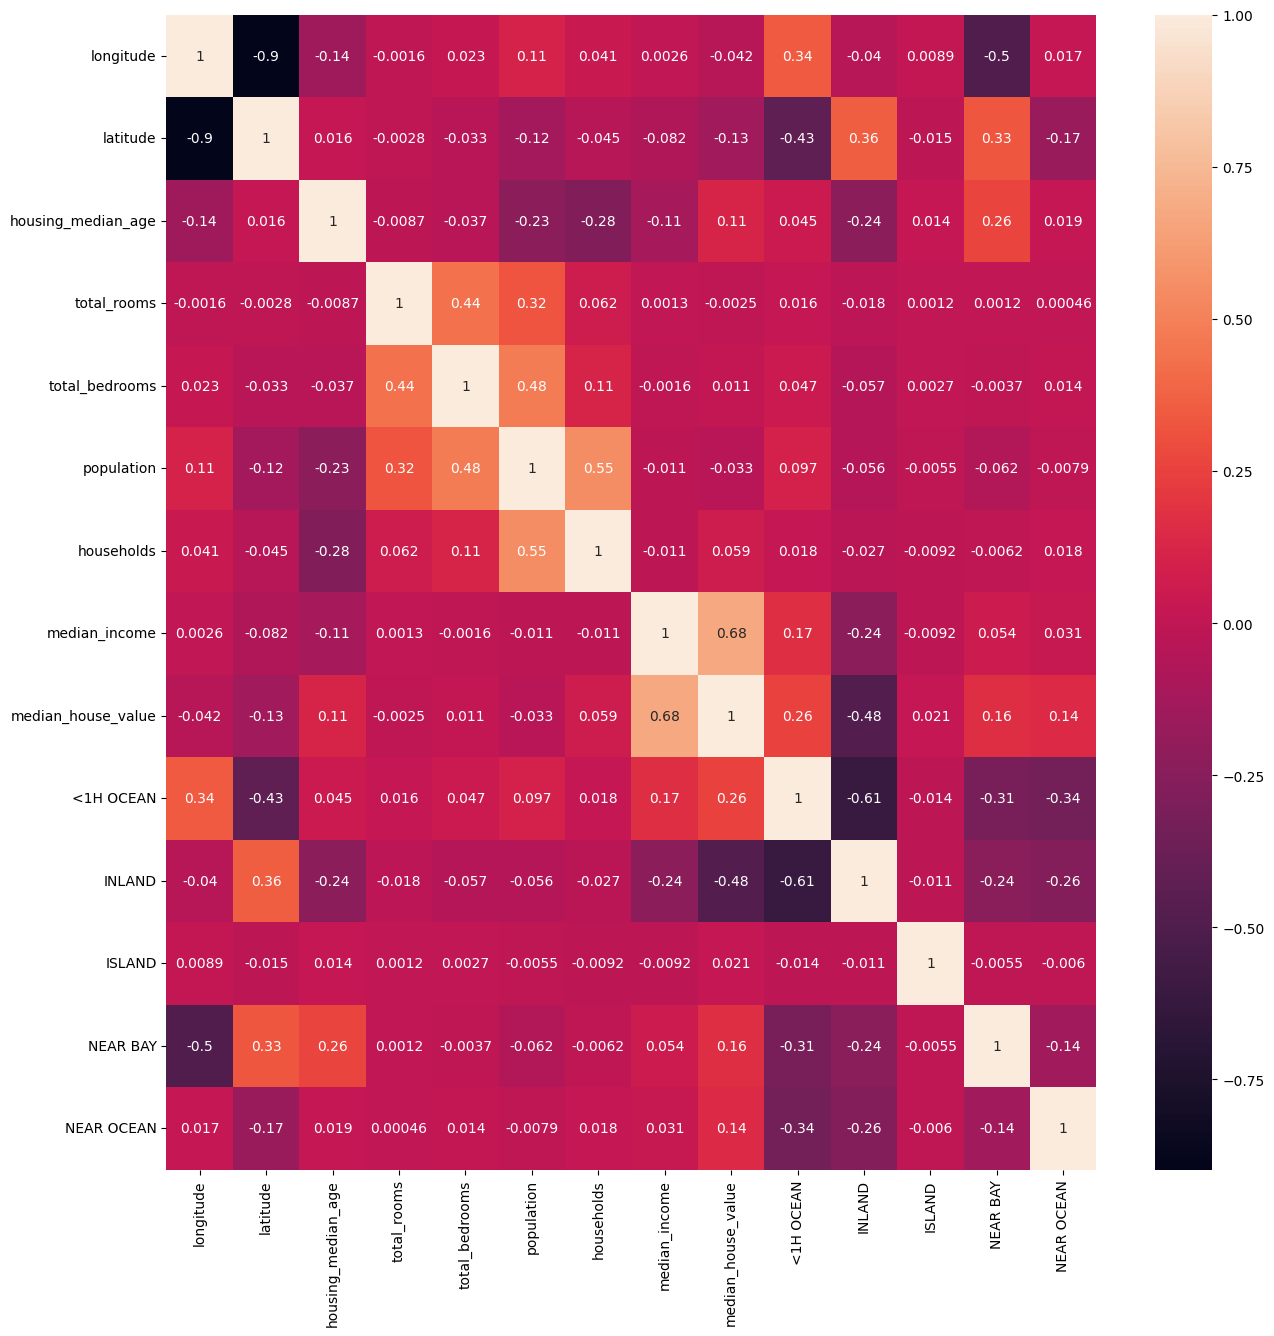

In [34]:
plt.figure(figsize=(15,15))
sns.heatmap(train_data.corr(),annot=True)